In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:

file_path = r"D:\SEMESTER 3\PYTHON G\Assignment 2\Advertising.csv" 
data = pd.read_csv(file_path)

print(data.head())


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [6]:
# missing values 
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [9]:
duplicate_count = data.duplicated().sum()
print(f"Duplicate Rows Found: {duplicate_count}")

Duplicate Rows Found: 0


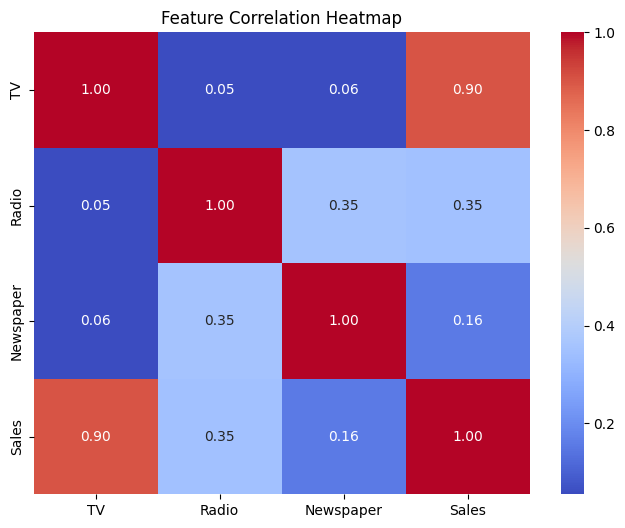

In [11]:
#Check Correlation Between Features
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

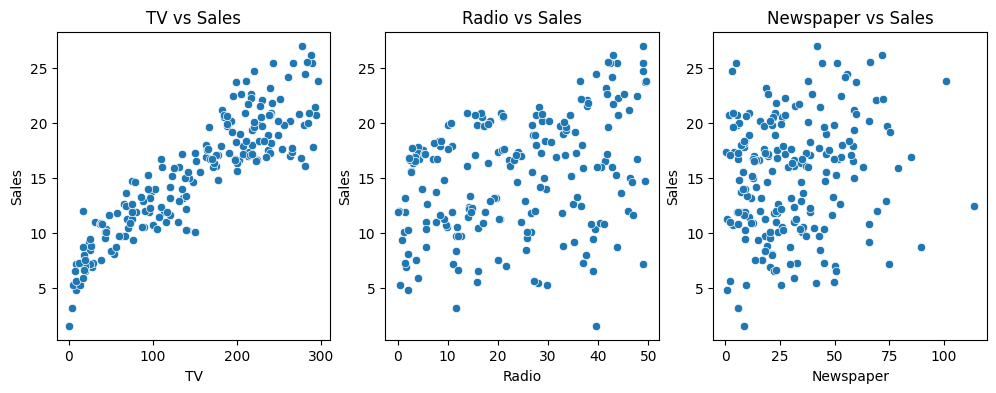

In [13]:
#Checking Linear Relationships
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(x=data["TV"], y=data["Sales"])
plt.title("TV vs Sales")

plt.subplot(1, 3, 2)
sns.scatterplot(x=data["Radio"], y=data["Sales"])
plt.title("Radio vs Sales")

plt.subplot(1, 3, 3)
sns.scatterplot(x=data["Newspaper"], y=data["Sales"])
plt.title("Newspaper vs Sales")

plt.show()

In [16]:
#Creating Total_Budget to represents the total amount spent on advertising across all channels
data["Total_Budget"] = data["TV"] + data["Radio"] + data["Newspaper"]
data.head()

,TV,Radio,Newspaper,Sales,Total_Budget
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,12.0,132.4
3,151.5,41.3,58.5,16.5,251.3
4,180.8,10.8,58.4,17.9,250.0


In [18]:
#Spliting Data into Training & Testing Sets
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Sales']) 
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data successfully split into training and testing sets!")


Data successfully split into training and testing sets!


In [22]:
# Training Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)  
mse = mean_squared_error(y_test, y_pred)  
rmse = np.sqrt(mse)  
r2 = r2_score(y_test, y_pred)  

print(f"Model Performance:")
print(f"MAE: {mae:.2f}")  
print(f"MSE: {mse:.2f}")  
print(f"RMSE: {rmse:.2f}")  
print(f"R²: {r2:.2f}")  


Model Performance:
MAE: 1.27
MSE: 2.91
RMSE: 1.71
R²: 0.91


In [23]:
#saving this file as pickle file
import pickle

with open("advertising_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

print("Model saved as 'advertising_model.pkl'")


Model saved as 'advertising_model.pkl'
